In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
cc09 = pd.read_csv('City Council/2009_November Municipal (General) City Council At Large Results.csv')
cc19 = pd.read_csv('City Council/2019_November Municipal (General) City Council At Large Results.csv')
m09 = pd.read_csv('Mayoral Election/2009_November Municipal (General) Mayoral Results.csv')
m17 = pd.read_csv('Mayoral Election/2017_November Municipal (General) Mayoral Results.csv')

df = pd.DataFrame(columns=['Ward/Precinct', 'CC Ballots 2009', 'CC Ballots 2019',
                           'M Ballots 2009', 'M Ballots 2017', 'CC Voter Turnout 2009',
                           'CC Voter Turnout 2019', 'M Voter Turnout 2009', 'M Voter Turnout 2017',
                           'CC % Net Change','M % Net Change', 'CC Net Change', 'M Net Change', 'Neighborhood'])
df['Ward/Precinct'] = cc09['Ward/Precinct']
df['CC Ballots 2009'] = cc09['BALLOTS CAST']
df['CC Ballots 2019'] = cc19['BALLOTS CAST']
df['M Ballots 2009'] = m09['BALLOTS CAST']
df['M Ballots 2017'] = m17['BALLOTS CAST']

for i in range(len(df)):
    df.loc[i, 'CC Voter Turnout 2009'] = round(cc09.loc[i, 'BALLOTS CAST']/cc09.loc[i, 'CVAP'],2)
    df.loc[i, 'CC Voter Turnout 2019'] = round(cc19.loc[i, 'BALLOTS CAST']/cc19.loc[i, 'CVAP'],2)
    df.loc[i, 'M Voter Turnout 2009'] = round(m09.loc[i, 'BALLOTS CAST']/m09.loc[i, 'CVAP'],2)
    df.loc[i, 'M Voter Turnout 2017'] = round(m17.loc[i, 'BALLOTS CAST']/m17.loc[i, 'CVAP'],2)
    df.loc[i, 'CC % Net Change'] = df.loc[i, 'CC Voter Turnout 2019'] - df.loc[i, 'CC Voter Turnout 2009']
    df.loc[i, 'M % Net Change'] = df.loc[i, 'M Voter Turnout 2017'] - df.loc[i, 'M Voter Turnout 2009']
    df.loc[i, 'CC Net Change'] = df.loc[i, 'CC Ballots 2019'] - df.loc[i, 'CC Ballots 2009']
    df.loc[i, 'M Net Change'] = df.loc[i, 'M Ballots 2017'] - df.loc[i, 'M Ballots 2009']
df

,Ward/Precinct,CC Ballots 2009,CC Ballots 2019,M Ballots 2009,M Ballots 2017,CC Voter Turnout 2009,CC Voter Turnout 2019,M Voter Turnout 2009,M Voter Turnout 2017,CC % Net Change,M % Net Change,CC Net Change,M Net Change,Neighborhood
0,101,397,280,397,495.0,0.74,0.31,0.74,0.56,-0.43,-0.18,-117,98.0,NaN
1,102,273,147,273,298.0,0.34,0.11,0.34,0.23,-0.23,-0.11,-126,25.0,NaN
2,103,600,374,600,711.0,0.42,0.2,0.42,0.37,-0.22,-0.05,-226,111.0,NaN
3,104,183,125,183,230.0,0.34,0.12,0.34,0.23,-0.22,-0.11,-58,47.0,NaN
4,105,286,133,286,355.0,0.29,0.11,0.29,0.3,-0.18,0.01,-153,69.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2209,304,278,304,284.0,0.26,0.23,0.26,0.24,-0.03,-0.02,-26,-20.0,NaN
250,2210,470,344,470,391.0,0.28,0.18,0.28,0.21,-0.1,-0.07,-126,-79.0,NaN
251,2211,316,249,316,265.0,0.18,0.12,0.18,0.13,-0.06,-0.05,-67,-51.0,NaN
252,2212,372,282,372,284.0,0.23,0.14,0.23,0.14,-0.09,-0.09,-90,-88.0,NaN


In [71]:
neighbs = pd.read_csv('WardPrecinct_Matched_To_Neighborhood.csv').drop('Unnamed: 0', axis=1)
props = pd.read_csv('Neighborhood_Make_Up_Of_Precincts.csv').drop('Unnamed: 0', axis=1)
neighbs['%'] = np.zeros(len(neighbs))

for i in range(len(neighbs)):
    wp = neighbs.loc[i, 'WARD_PRECI']
    filt = neighbs['WARD_PRECI'] == wp
    inds = neighbs.index[filt].tolist()
    for n in inds:
        if n == 219:
            print(wp)
        neighb = neighbs.loc[n, 'NEIGHBORHOOD']
        temp = props[['WARD_PRECI', neighb]]
        filt2 = temp['WARD_PRECI'] == wp
        neighbs.loc[n, '%'] = round(temp[filt2].reset_index(drop=False).loc[0, neighb],4)

0101


In [69]:
neighbs

,WARD_PRECI,NEIGHBORHOOD,%
0,1814,Roslindale,0.0005
1,1814,Hyde Park,0.9995
2,1822,Roslindale,0.2581
3,1822,Hyde Park,0.7419
4,1811,Roslindale,0.3590
...,...,...,...
399,0605,South Boston,0.9521
400,2105,Allston,0.9968
401,2103,Allston,0.9815
402,2104,Allston,1.0000


In [76]:
neighbs[neighbs['WARD_PRECI'] == '0101']

,WARD_PRECI,NEIGHBORHOOD,%
219,0101,East Boston,0.99


Text(0, 0.5, '% Net Change')

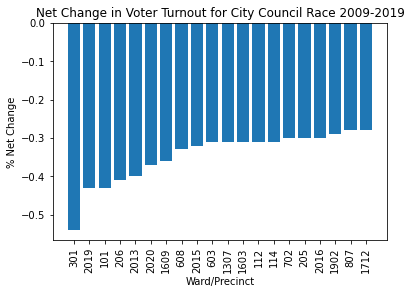

In [54]:
temp = df.sort_values(by=['CC % Net Change']).head(20).reset_index(drop=False)
temp = temp.astype({'Ward/Precinct' : str})
plt.bar(temp['Ward/Precinct'],temp['CC % Net Change'])
plt.xticks(rotation=90)
plt.title('Net Change in Voter Turnout for City Council Race 2009-2019')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

Text(0, 0.5, '% Net Change')

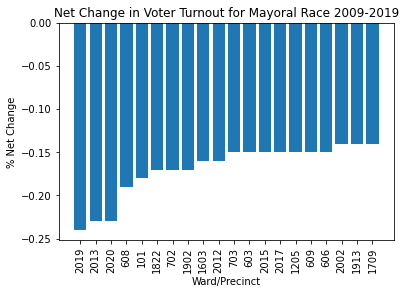

In [55]:
temp1 = df.sort_values(by=['M % Net Change']).head(20).reset_index(drop=False)
temp1 = temp1.astype({'Ward/Precinct' : str})
plt.bar(temp1['Ward/Precinct'],temp1['M % Net Change'])
plt.xticks(rotation=90)
plt.title('Net Change in Voter Turnout for Mayoral Race 2009-2019')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

In [57]:
overlap = []
for i in range(len(temp)):
    if temp.loc[i, 'Ward/Precinct'] in temp1['Ward/Precinct'].tolist():
        overlap.append(temp.loc[i, 'Ward/Precinct'])
overlap

['2019', '101', '2013', '2020', '608', '2015', '603', '1603', '702', '1902']

In [77]:
check = pd.DataFrame(columns=['Ward/Precinct', 'Neighborhood'])

for p in overlap:
    filt = neighbs['WARD_PRECI'] == str(p)
    if len(str(p)) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(p)
    display(neighbs[filt])

,WARD_PRECI,NEIGHBORHOOD,%
299,2019,West Roxbury,0.9849


,WARD_PRECI,NEIGHBORHOOD,%
219,0101,East Boston,0.99


,WARD_PRECI,NEIGHBORHOOD,%
295,2013,West Roxbury,1.0


,WARD_PRECI,NEIGHBORHOOD,%
300,2020,West Roxbury,0.9955


,WARD_PRECI,NEIGHBORHOOD,%
394,0608,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
289,2015,West Roxbury,0.9897


,WARD_PRECI,NEIGHBORHOOD,%
397,0603,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
345,1603,Dorchester,1.0


,WARD_PRECI,NEIGHBORHOOD,%
391,0702,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
53,1902,Roslindale,0.0018
54,1902,Jamaica Plain,0.9977
55,1902,West Roxbury,0.0000


In [81]:
check['Ward/Precinct'] = overlap
for i in range(len(overlap)):
    filt = neighbs['WARD_PRECI'] == str(overlap[i])
    if len(str(overlap[i])) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(overlap[i])
    temp = neighbs[filt].sort_values(by='%').reset_index(drop=False)
    check.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']

check = check.sort_values(by='Neighborhood')
check

,Ward/Precinct,Neighborhood
7,1603,Dorchester
1,101,East Boston
4,608,South Boston
6,603,South Boston
8,702,South Boston
0,2019,West Roxbury
2,2013,West Roxbury
3,2020,West Roxbury
5,2015,West Roxbury
9,1902,West Roxbury
